In [107]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams['text.usetex'] = True
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [108]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [109]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [168]:
# Circuit parameters
Csh = 15
C   = 15
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ = 50
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [169]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

In [170]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h
E_L_f / GHz

6.539994179227587

In [171]:
E_C_f = e0**2 / (2*C_f) / h
E_C_f / GHz

0.7594573959979404

In [172]:
EJ_values = np.geomspace(1e-1,100,200)
fluxonium_vs_EJ = [ sq_ext.sq_fluxonium( EJ=EJ_i, CJ=CJ ) for EJ_i in EJ_values]
[fluxonium.diag(2) for fluxonium in fluxonium_vs_EJ];

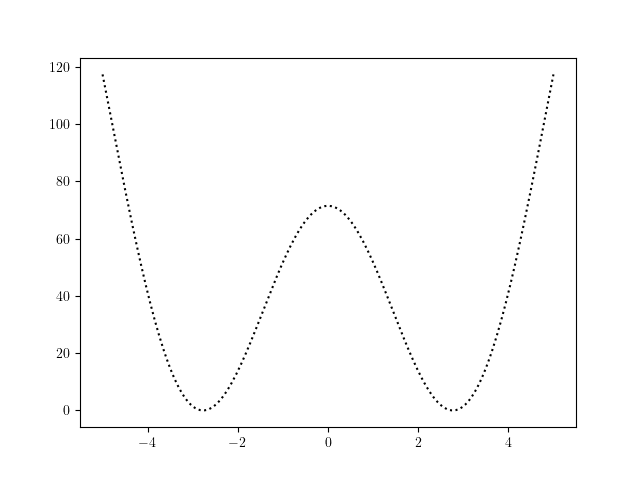

In [173]:
φ_f = np.linspace(-5,5,200)
φ_ext = np.pi
# φ_ext = 0
V_f = 0.5 * E_L_f * (φ_f)**2 - EJ*GHz * np.cos(φ_f-φ_ext)
# dVdφ = E_L_f * φ_f + 10*GHz * np.sin(φ_f + np.pi)
fig, ax = plt.subplots()
ax.plot(φ_f, (V_f-V_f.min())/1e9, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
# ax.plot(φ_f, dVdφ/1e9, 'k:')#, label = r'$\frac{1}{2}E_{L_{F}}\varphi_F^2 - E_J\cos(\varphi_F-\varphi_{ext})$')
fig.show()

In [174]:
q_r_limit = np.sqrt(0.5*np.sqrt(C_f/L_f))
q_r_limit

0.02247179258788244

In [175]:
Φ_r_limit = np.sqrt(0.5*np.sqrt(L_f/C_f))
Φ_r_limit

22.250116364531465

In [176]:
φ_min_vs_EJ = []
for EJ_i in EJ_values:
    V =  lambda φ: E_L_f*φ**2/2 - EJ_i*GHz*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x
    φ_min_vs_EJ.append(φ_min)
    print(φ_min)

1.98408627508608e-11
-1.4222847310307813e-10
8.152347063468353e-11
-1.8682905525141673e-10
1.9572513433507907e-11
-6.800826720387017e-11
-1.87912977936946e-10
-2.373114032157914e-10
-2.3283820324452087e-10
1.112996911787317e-11
-6.525063707070258e-11
-2.2396575393866264e-10
-3.0046712229240667e-10
-2.89418315761984e-10
-1.9653538135305042e-10
-3.4111734873897555e-11
-2.491876782557046e-10
1.8652421227599993e-11
1.7661160671827286e-11
1.4695906655702034e-10
1.0101041317107662e-11
1.8722446821720275e-11
-6.433425197811693e-11
-3.41204755553386e-11
1.663024275945758e-11
-1.7012000592348843e-09
1.9923423117523378e-11
-7.544117443361931e-11
-1.7021752960460864e-09
1.1964019548870047e-11
-4.9891880374394975e-11
-1.7956301229748013e-10
-6.098474555402427e-11
1.65192728781862e-11
1.484726652962002e-11
-2.0219120595330246e-10
1.9288910713469757e-11
-3.350591028761651e-11
-4.6946250859246777e-11
-5.615789917741159e-11
1.0961279108871057e-11
1.452232813291105e-11
-5.145905436413888e-11
1.61013960

In [177]:
Φ_fq_limit = [ (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) for φ_min in φ_min_vs_EJ]
Φ_fq_limit

[6.359186057106441e-10,
 -4.558558437895514e-09,
 2.6129051155525687e-09,
 -5.988049703965787e-09,
 6.273177537276804e-10,
 -2.17972993413332e-09,
 -6.022790461539447e-09,
 -7.60605718345969e-09,
 -7.46268685100417e-09,
 3.567261430067281e-10,
 -2.091345253922097e-09,
 -7.17831637464598e-09,
 -9.63025831433601e-09,
 -9.27613350979402e-09,
 -6.2991467282550135e-09,
 -1.09331369062764e-09,
 -7.986703144235264e-09,
 5.978279195378436e-10,
 5.660570717456735e-10,
 4.710178477366042e-09,
 3.2374802402793853e-10,
 6.000723067268583e-10,
 -2.0619742362557508e-09,
 -1.0935938378180492e-09,
 5.330151677887586e-10,
 -5.452508710371366e-08,
 6.385647443344674e-10,
 -2.4179617117163573e-09,
 -5.45563443751844e-08,
 3.8345825611248934e-10,
 -1.5990824291444189e-09,
 -5.7551660858327735e-09,
 -1.954619355483974e-09,
 5.294584770812988e-10,
 4.758690762941067e-10,
 -6.480421309864636e-09,
 6.182280156166407e-10,
 -1.07389643387572e-09,
 -1.504672189139513e-09,
 -1.7999143178886788e-09,
 3.51319467063

In [178]:
ω_f_vs_EJ = [fluxonium._efreqs[1]- fluxonium._efreqs[0] for fluxonium in fluxonium_vs_EJ]
ω_f_vs_EJ

[39367978478.416435,
 39359542367.3009,
 39350807196.39445,
 39341762324.43206,
 39332396728.65266,
 39322698990.91898,
 39312657283.31313,
 39302259353.19505,
 39291492507.69846,
 39280343597.64184,
 39268799000.83305,
 39256844604.740234,
 39244465788.50772,
 39231647404.2885,
 39218373757.862366,
 39204628588.51525,
 39190395048.153885,
 39175655679.603615,
 39160392394.08872,
 39144586447.82878,
 39128218417.7394,
 39111268176.18121,
 39093714864.73049,
 39075536866.923294,
 39056711779.9323,
 39037216385.1259,
 39017026617.47505,
 38996117533.73476,
 38974463279.37574,
 38952037054.18833,
 38928811076.51306,
 38904756546.03074,
 38879843605.05765,
 38854041298.26657,
 38827317530.773636,
 38799639024.5116,
 38770971272.81485,
 38741278493.13222,
 38710523577.7827,
 38678668042.66295,
 38645671973.81329,
 38611493971.73911,
 38576091093.38335,
 38539418791.63683,
 38501430852.27348,
 38462079328.179436,
 38421314470.74987,
 38379084658.31498,
 38335336321.446945,
 38290013864.99234

In [179]:
q_fq_limit = [ω_f * C_f * Φ_fq for ω_f, Φ_fq in zip(ω_f_vs_EJ, Φ_fq_limit)]
q_fq_limit

[6.383881645828513e-13,
 -4.575280736239221e-12,
 2.6219080983268384e-12,
 -6.007300920127848e-12,
 6.291847244958809e-13,
 -2.185678034076215e-12,
 -6.037683381244545e-12,
 -7.622848418028909e-12,
 -7.47711266458502e-12,
 3.5731429942292785e-13,
 -2.0941777186491316e-12,
 -7.185850286300058e-12,
 -9.637325745262015e-12,
 -9.279908977849275e-12,
 -6.299578413980186e-12,
 -1.0930054078807851e-12,
 -7.981552309550276e-12,
 5.972176686524426e-13,
 5.6525893469874e-13,
 4.701638709094918e-12,
 3.230259266101565e-13,
 5.984745172940926e-13,
 -2.05556093769037e-12,
 -1.0896855413410328e-12,
 5.308544044577739e-13,
 -5.4276944403980444e-11,
 6.353298894803161e-13,
 -2.4044235371051194e-12,
 -5.422075813294385e-11,
 3.8088024512111717e-13,
 -1.5873846333883343e-12,
 -5.709535054008067e-12,
 -1.937880018640205e-12,
 5.245758391229698e-13,
 4.711563530728544e-13,
 -6.4116691925122636e-12,
 6.112171661548137e-13,
 -1.060905080847801e-12,
 -1.4852895304902352e-12,
 -1.7752663543747342e-12,
 3.4621

In [180]:
q_n = [np.imag( fluxonium.charge_op(0,'eig')[1,0]) for fluxonium in fluxonium_vs_EJ]
q_n

[0.02240405298318635,
 0.022401652166850947,
 0.022399165962219376,
 0.022396591310723336,
 0.02239392504267287,
 0.022391163873105534,
 0.022388304397472848,
 0.022385343087155937,
 0.02238227628480425,
 0.022379100199488803,
 0.02237581090166144,
 0.022372404317913108,
 0.022368876225520962,
 0.02236522224677533,
 0.022361437843076686,
 0.022357518308792203,
 0.022353458764861413,
 0.02234925415213874,
 0.022344899224461343,
 0.022340388541429577,
 0.022335716460886737,
 0.02233087713108284,
 0.02232586448251033,
 0.022320672219391782,
 0.02231529381080737,
 0.022309722481441557,
 0.02230395120193145,
 0.022297972678798142,
 0.02229177934393783,
 0.02228536334365446,
 0.022278716527206963,
 0.022271830434848747,
 0.022264696285333316,
 0.022257304962856293,
 0.022249647003407994,
 0.022241712580502,
 0.02223349149024838,
 0.022224973135736483,
 0.02221614651068867,
 0.022207000182346486,
 0.022197522273546245,
 0.022187700443938245,
 0.022177521870302898,
 0.02216697322591054,
 0.022

In [181]:
Φ_n = [np.real( fluxonium.flux_op(0,'eig')[1,0]) for fluxonium in fluxonium_vs_EJ]
Φ_n

[22.317384509538893,
 22.319775855313043,
 22.32225277618927,
 22.324818375363773,
 22.327475871525987,
 22.330228603371346,
 22.333080034305706,
 22.336033757350574,
 22.3390935002595,
 22.342263130854878,
 22.34554666259676,
 22.3489482603951,
 22.35247224667762,
 22.356123107725878,
 22.359905500293536,
 22.363824258520644,
 22.367884401160907,
 22.372091139135723,
 22.37644988343451,
 22.380966253377956,
 22.385646085265304,
 22.390495441424264,
 22.39552061968818,
 22.40072816332073,
 22.406124871416175,
 22.41171780979941,
 22.417514322455204,
 22.423522043517,
 22.429748909845756,
 22.43620317423614,
 22.442893419283944,
 22.44982857195518,
 22.45701791889995,
 22.46447112255318,
 22.4721982380736,
 22.480209731170408,
 22.488516496873384,
 22.49712987930663,
 22.50606169252833,
 22.515324242506225,
 22.52493035030215,
 22.53489337654416,
 22.545227247272656,
 22.555946481251624,
 22.567066218844538,
 22.57860225256237,
 22.59057105939729,
 22.602989835070243,
 22.61587653032385

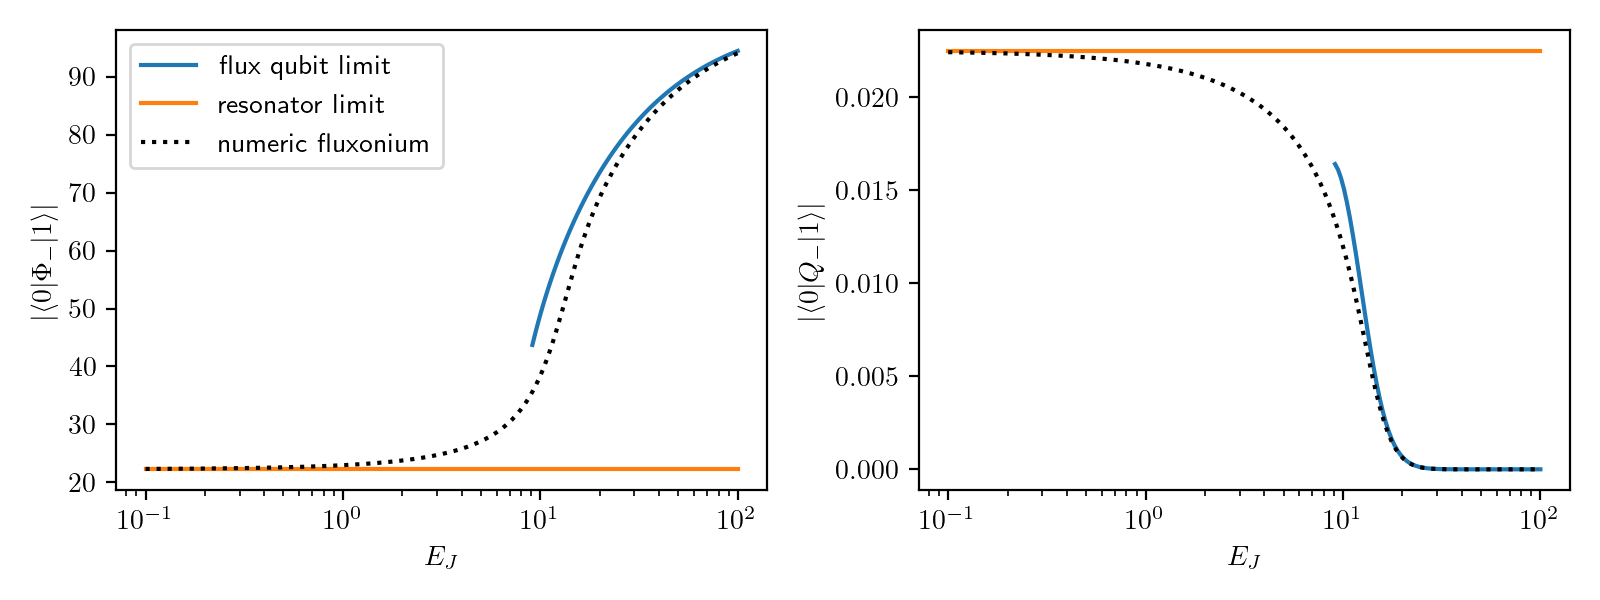

In [193]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=[8,3], dpi=200)
ax1.plot(EJ_values[130:], Φ_fq_limit[130:], label='flux qubit  limit')
ax1.plot(EJ_values, Φ_r_limit*np.ones(len(EJ_values)), label='resonator limit')
ax1.plot(EJ_values, Φ_n,':k', label='numeric fluxonium')
ax1.set_ylabel(r'$|\langle 0 | \Phi_- |1\rangle|$')
ax1.set_xlabel('$E_J$')
ax1.set_xscale('log')
ax1.legend( )
# ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2.plot(EJ_values[130:], q_fq_limit[130:])
ax2.plot(EJ_values, q_r_limit*np.ones(len(EJ_values)))
ax2.plot(EJ_values, q_n,':k')
ax2.set_xscale('log')
ax2.set_ylabel(r'$|\langle 0 | Q_- |1\rangle|$')
ax2.set_xlabel('$E_J$')
fig.tight_layout()
fig.show()
figs.export('flux_and_charge_operators.pdf', fig)

In [136]:
q_r_limit

0.02247179258788244

In [ ]:
EJ_values